In [1]:
#!/usr/bin/env python
# coding=utf8

import sys
reload(sys)
sys.setdefaultencoding('utf8')

'''
Competition URL: https://www.kaggle.com/c/digit-recognizer
Solution:  Random Forest
'''

In [2]:
# import baobao
import numpy as np
import pandas as pd

import sklearn as skl
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [3]:
# Read data
# DataFrame
train_df = pd.read_csv('train.csv')
# Cnvert DataFrame to array
train_data = train_df.values 

test_df = pd.read_csv('test.csv')
test_data = test_df.values

In [4]:
train_data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

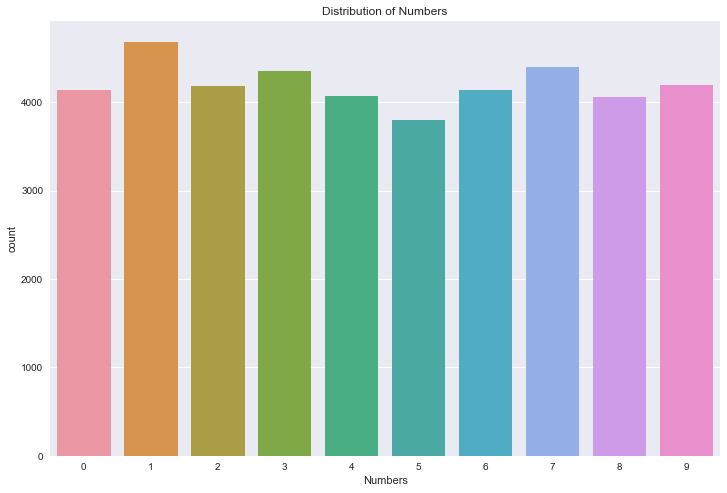

In [10]:
# 画图
plt.figure(figsize=(12,8))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Numbers')
plt.xlabel('Numbers');
plt.show()

In [6]:
num_features = train_data.shape[0] # 这里返回的是train_data的行数作为特征个数
print("Number of all features: \t\t", num_features)
split = int(num_features * 2/3) # 这里是取2/3行也就是前28000行作为训练 后1/3也就是14000作为测试

In [9]:
train = train_data[:split] # 取出前28000行作为训练数据
test = train_data[split:] # 取出后14000行作为测试数据

In [10]:
print("Number of features used for training: \t", len(train), 
      "\nNumber of features used for testing: \t", len(test))

In [11]:
# 开始使用随机森林分类器
clf = RandomForestClassifier(n_estimators=100) # 定义为100 tree

In [17]:
# 开始训练，训练的X数据格式为[[]]，训练的y值为[]也就是经过ravel后的数据
# 如果你问我ravel()的作用是什么，就是不管什么数据格式的数据都转成一个array，这样每个元素都是一个平等且顺序的位置
model = clf.fit(train[:,1:], train[:,0].ravel())

In [18]:
# 然后预测
output = model.predict(test[:,1:])

In [27]:
# 计算准确度：将每个
acc = np.mean(output == test[:,0].ravel()) *100
print("The accuracy of the pure RandomForest classifier is: \t", acc, "%")

In [28]:
acc

96.33571428571429

In [29]:
# 利用
clf = RandomForestClassifier(n_estimators=100) # 100 trees

In [46]:
# 用全部训练数据来做训练
target = train_data[:,0].ravel()
train = train_data[:,1:]
model = clf.fit(train, target)

In [47]:
output = model.predict(test_data)

In [48]:
pd.DataFrame({"ImageId": range(1, len(output)+1), "Label": output}).to_csv('out.csv', index=False, header=True)

In [49]:
output

array([2, 0, 9, ..., 3, 9, 2])